In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import gzip
import pandas as pd
import numpy as np
import holoviews as hv
import geoviews as gv
import cartopy.crs as ccrs
import pyproj
import glob
from pathlib import Path
from tqdm import tqdm
from shapely import LineString

import stream_util

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
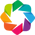

In [3]:
hv.extension('bokeh')

### Single file

Test playground for messing with individual files. Feel free to skip this section.

In [4]:
#gps_path = "/kucresis/scratch/data/UTIG/UTIG2/targ/pcor/AMY/JKB2u/X62c/GPSnc1/xds.gz"
gps_path = "/kucresis/scratch/data/UTIG/UTIG1/targ/pcor/ALG/JKB0a/X01a/GPStp2/xds.gz"

file = gzip.open(gps_path, 'rt')
pd.read_csv(file, sep=r',', index_col=False, on_bad_lines='warn')

-67.338207642 0138.800471690  270.6  170.7 1330199.2     1.9   6574.2     1330199.2     8298020.1 11:05:02.1 
0     -67.338153258 0138.798413420  271.5  170.7 132...                                                           
1     -67.338082947 0138.796276530  272.6  170.7 132...                                                           
2     -67.338001555 0138.794162290  273.5  170.7 132...                                                           
3     -67.337909209 0138.792094580  274.4  170.6 132...                                                           
4     -67.337807194 0138.790071160  275.2  170.5 132...                                                           
...                                                 ...                                                           
1300  -66.573281050 0139.702252800   36.6  148.6 145...                                                           
1301  -66.572755730 0139.703329470   37.8  148.4 145...                                                           
1302  -66.572235080 0139.704442150   39.0  148.2 145...                                                           
1303  -66.571776221 0139.705486250   40.3  134.4 145...                                                           
1304  -66.571312236 0139.706626320   42.5  147.6 145...                                                           

[1305 rows x 1 columns]

In [5]:
df = stream_util.load_gzipped_stream_file(gps_path, debug=True, parse=True, parse_kwargs={'use_ct': True})
df

Other files in /kucresis/scratch/data/UTIG/UTIG1/targ/pcor/ALG/JKB0a/X01a/GPStp2:
 -> bxds.gz 
 -> ct.gz 
 -> xds.gz (this file)
Column names: ['latitude', 'longitude', 'track', 'ground_speed', 'offline_distance', 'PDOP', 'gps_height', 'easting', 'northing', 'dos_time']
Found ct.gz file: /kucresis/scratch/data/UTIG/UTIG1/targ/pcor/ALG/JKB0a/X01a/GPStp2/ct.gz
len(ct_df): 1306, len(df): 1306


latitude   longitude  track  ground_speed  offline_distance  PDOP  \
0    -67.338208  138.800472  270.6         170.7         1330199.2   1.9   
1    -67.338153  138.798413  271.5         170.7         1329908.3   1.9   
2    -67.338083  138.796277  272.6         170.7         1329606.1   1.9   
3    -67.338002  138.794162  273.5         170.7         1329307.0   1.9   
4    -67.337909  138.792095  274.4         170.6         1329014.3   1.9   
...         ...         ...    ...           ...               ...   ...   
1301 -66.573281  139.702253   36.6         148.6         1451533.3   2.3   
1302 -66.572756  139.703329   37.8         148.4         1451686.0   2.3   
1303 -66.572235  139.704442   39.0         148.2         1451844.0   2.3   
1304 -66.571776  139.705486   40.3         134.4         1451992.5   2.3   
1305 -66.571312  139.706626   42.5         147.6         1452154.9   2.3   

      gps_height    easting   northing    dos_time  ... clk_n clk_d clk_h  \
0         6574.2  1330199.2  8298020.1  11:05:02.1  ...     1     7    11   
1         6578.8  1329908.3  8298029.6  11:05:03.1  ...     1     7    11   
2         6585.0  1329606.1  8298044.7  11:05:04.2  ...     1     7    11   
3         6590.6  1329307.0  8298063.8  11:05:05.2  ...     1     7    11   
4         6596.5  1329014.3  8298087.2  11:05:06.2  ...     1     7    11   
...          ...        ...        ...         ...  ...   ...   ...   ...   
1301      3600.8  1451533.3  8581314.0  11:26:43.2  ...     1     7    11   
1302      3603.3  1451686.0  8581509.4  11:26:44.2  ...     1     7    11   
1303      3605.1  1451844.0  8581703.1  11:26:45.2  ...     1     7    11   
1304      3606.7  1451992.5  8581874.0  11:26:46.2  ...     1     7    11   
1305      3608.6  1452154.9  8582047.1  11:26:47.1  ...     1     7    11   

      clk_m  clk_s  clk_f        tim        LAT         LON  \
0         4     54     56    8107427 -67.338208  138.800472   
1         4     55     58    8208982 -67.338153  138.798413   
2         4     56     64    8315226 -67.338083  138.796277   
3         4     57     68    8419386 -67.338002  138.794162   
4         4     58     54    8505318 -67.337909  138.792095   
...     ...    ...    ...        ...        ...         ...   
1301     26     35     13  138176891 -66.573281  139.702253   
1302     26     36     13  138276885 -66.572756  139.703329   
1303     26     37     11  138374795 -66.572235  139.704442   
1304     26     38     12  138475310 -66.571776  139.705486   
1305     26     39     10  138574262 -66.571312  139.706626   

               TIMESTAMP  
0    2009-01-01 11:04:54  
1    2009-01-01 11:04:55  
2    2009-01-01 11:04:56  
3    2009-01-01 11:04:57  
4    2009-01-01 11:04:58  
...                  ...  
1301 2009-01-01 11:26:35  
1302 2009-01-01 11:26:36  
1303 2009-01-01 11:26:37  
1304 2009-01-01 11:26:38  
1305 2009-01-01 11:26:39  

[1306 rows x 25 columns]

In [6]:
df_sub = df[['prj', 'set', 'trn', 'clk_y', 'LAT', 'LON']][::100]

path = gv.Path(df_sub,
                ['LON', 'LAT'],
                ['prj', 'set', 'trn', 'clk_y'],
                crs=ccrs.PlateCarree()
              ).opts(
                projection=ccrs.SouthPolarStereo(),
                tools=['hover'],
                color='red',
                line_width=2
              )

stream_util.create_antarctica_basemap() * path

:Overlay
   .Feature.I  :Feature   [Longitude,Latitude]
   .Feature.II :Feature   [Longitude,Latitude]
   .Path.I     :Path   [LON,LAT]   (prj,set,trn,clk_y)

### Multi-file

In [7]:
cache_file = 'outputs/file_index.csv'

def find_gps_xds_files(base_path, file_index_cache=None):
    if file_index_cache:
        df = pd.read_csv(file_index_cache, index_col=0)
        files = list(df.apply(lambda row: Path(*row[:-1]).as_posix(), axis=1))
        files = [f for f in files if ('GPS' in f) and (f.startswith(base_path))]
        print(f"Loaded {len(files)} candidate GPS files from a cache.")
        return files

    pattern = '**/GPS*/xds.gz'

    all_files = glob.glob(os.path.join(base_path, pattern), recursive=True)

    print(f"Found {len(all_files)} candidate GPS files.")

    return all_files

print("== UTIG1 ==")
all_files_utig1 = find_gps_xds_files("/kucresis/scratch/data/UTIG/UTIG1", file_index_cache=cache_file)
print("== UTIG2 ==")
all_files_utig2 = find_gps_xds_files("/kucresis/scratch/data/UTIG/UTIG2", file_index_cache=cache_file)

== UTIG1 ==
Loaded 5287 candidate GPS files from a cache.
== UTIG2 ==
Loaded 427 candidate GPS files from a cache.


In [8]:
def load_gps_data(all_files):
    segment_dfs = []
    file_paths_success = []
    file_paths_success_line_km = []
    file_paths_fail = []

    for f in tqdm(all_files):
        if 'GPSkc1' in f:
            file_paths_fail.append(f)
            continue # GPSkc1 does not contain position information
        if 'GPSap3' in f:
            file_paths_fail.append(f)
            continue # GPSap3 does not contain position information
        if 'GPSnc2' in f:
            file_paths_fail.append(f)
            continue # GPSnc2 does not contain position information
        if 'GPSgp1' in f:
            file_paths_fail.append(f)
            # It appears that all segments with a GPSgp1 file already have either a GPSnc1 or GPStp2 file that we can parse
            continue # No stream format information available for GPSgp1

        try:
            df = stream_util.load_gzipped_stream_file(f, debug=False, parse=True, parse_kwargs={'use_ct': True})

            line_length_km = stream_util.calculate_track_distance_km(df)

            necessary_keys = ['prj', 'set', 'trn', 'clk_y', 'LAT', 'LON', 'TIMESTAMP']
            for k in necessary_keys:
                if k not in df:
                    df[k] = np.nan

            df_sub = df[['prj', 'set', 'trn', 'clk_y', 'LAT', 'LON', 'TIMESTAMP']]

            segment_dfs.append(df_sub)

            file_paths_success.append(f)
            file_paths_success_line_km.append(line_length_km)
        except Exception as e:
            file_paths_fail.append(f)
            print(f"Error loading {f}: {e}")

    print(f"Successfully loaded {len(file_paths_success)} files.")
    print(f"Failed to load {len(file_paths_fail)} files.")
    print(f"Skipped loading {len(all_files) - len(file_paths_success) - len(file_paths_fail)} files.")

    return {
        'segment_dfs': segment_dfs,
        'file_paths_success': file_paths_success,
        'file_paths_success_line_km': file_paths_success_line_km,
        'file_paths_fail': file_paths_fail
    }

print("== UTIG1 ==")
data_utig1 = load_gps_data(all_files_utig1)
print("== UTIG2 ==")
data_utig2 = load_gps_data(all_files_utig2)

== UTIG1 ==


 11%|█         | 563/5287 [00:19<05:17, 14.89it/s]  

 93%|█████████▎| 4920/5287 [03:06<00:56,  6.54it/s] /kucresis/scratch/tteisberg_sta/scripts/tmp/load_utig_2/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1518: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
 93%|█████████▎| 4926/5287 [03:08<01:07,  5.34it/s]/kucresis/scratch/tteisberg_sta/scripts/tmp/load_utig_2/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1518: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
100%|██████████| 5287/5287 [03:19<00:00, 26.44it/s] 


Successfully loaded 857 files.
Failed to load 4430 files.
Skipped loading 0 files.
== UTIG2 ==


100%|██████████| 427/427 [00:30<00:00, 13.95it/s]

Successfully loaded 189 files.
Failed to load 238 files.
Skipped loading 0 files.


In [24]:
# Set up the coordinate transformation
transformer = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:3031', always_xy=True)

def create_paths(segment_dfs, path_opts_kwargs={}):
    paths = []

    for idx, df_sub in enumerate(segment_dfs):
        df_tmp = df_sub.copy()
        df_tmp = df_tmp[df_tmp['LAT'] != 0]
        if len(df_tmp) < 2:
            continue

        if df_tmp['LAT'].max() > -60:
            print(f"segment_dfs[{idx}]['LAT'].max(): {df_tmp['LAT'].max()}")

        # Project coordinates from WGS84 to EPSG:3031
        x_proj, y_proj = transformer.transform(df_tmp['LON'].values, df_tmp['LAT'].values)

        dist_deltas = np.sqrt(np.diff(x_proj)**2 + np.diff(y_proj)**2)
        jump_idxs = np.argwhere(dist_deltas > 10000)
        if len(jump_idxs) > 0:
            #print(f"segment_dfs[{idx}] has large jumps at idxs {jump_idxs}")
            #print(f"jump lengths are {dist_deltas[jump_idxs]}")
            #print(f"total length of df is: {len(df_tmp)}")

            continue

        # Create LineString and simplify with 500m tolerance
        #print((len(x_proj), len(y_proj)))
        line = LineString(zip(x_proj, y_proj))
        simplified_line = line.simplify(tolerance=500)
        coords = list(simplified_line.coords)
        x_proj = [c[0] for c in coords]
        y_proj = [c[1] for c in coords]

        # Add projected coordinates to dataframe
        df_simplified = pd.DataFrame({
            'x': x_proj,
            'y': y_proj
        })
        for k in ['prj', 'set', 'trn', 'clk_y']:
            df_simplified[k] = df_tmp[k].iloc[0]
            if len(df_tmp[k].unique()) > 1:
                print(f"segment_dfs[{idx}]['{k}'].unique(): {df_tmp[k].unique()}")

        # Create hv.Path with already projected coordinates
        path = hv.Path(df_simplified,
                    ['x', 'y'],
                    ['prj', 'set', 'trn', 'clk_y']
                    ).opts(
                        tools=['hover'],
                        line_width=2,
                        **path_opts_kwargs
                    )

        paths.append(path)
    return paths

print("== UTIG1 ==")
paths_utig1 = create_paths(data_utig1['segment_dfs'], path_opts_kwargs={'color': 'orange'})
print(f"Generated {len(paths_utig1)} paths from {len(data_utig1['segment_dfs'])} segments.")

print("== UTIG2 ==")
paths_utig2 = create_paths(data_utig2['segment_dfs'], path_opts_kwargs={'color': 'purple'})
print(f"Generated {len(paths_utig2)} paths from {len(data_utig2['segment_dfs'])} segments.")

# Note: No projection needed in visualization since coordinates are already in EPSG:3031
p = stream_util.create_antarctica_basemap() * hv.Overlay(paths_utig1 + paths_utig2)
p = p.opts(aspect='equal', frame_width=500, frame_height=500)
p

== UTIG1 ==
segment_dfs[78]['LAT'].max(): 23.945403074
segment_dfs[90]['LAT'].max(): 11.29953667
segment_dfs[174]['LAT'].max(): 10.835035765
segment_dfs[248]['clk_y'].unique(): [1904 2014]
segment_dfs[822]['LAT'].max(): 6.993673156
segment_dfs[841]['LAT'].max(): 7.703361707


/kucresis/scratch/tteisberg_sta/scripts/tmp/load_utig_2/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1518: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/kucresis/scratch/tteisberg_sta/scripts/tmp/load_utig_2/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1518: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


segment_dfs[845]['LAT'].max(): 12.251164373
Generated 805 paths from 857 segments.
== UTIG2 ==
Generated 189 paths from 189 segments.


:Overlay
   .Ocean.I           :Feature   [Longitude,Latitude]
   .Coastline.I       :Feature   [Longitude,Latitude]
   .Path.I            :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.II           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.III          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.IV           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.V            :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.VI           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.VII          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.VIII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.IX           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.X            :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XI           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XII          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XIII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XIV          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XV           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XVI          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XVII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XVIII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XIX          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XX           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXI          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXIII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXIV         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXV          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXVI         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXVII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXVIII       :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXIX         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXX          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXI         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXIII       :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXIV        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXV         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXVI        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXVII       :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXVIII      :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XXXIX        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XL           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLI          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLIII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLIV         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLV          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLVI         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLVII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLVIII       :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.XLIX         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.L            :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LI           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LII          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LIII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LIV          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LV           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LVI          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LVII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LVIII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LIX          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LX           :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LXI          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LXII         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LXIII        :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LXIV         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LXV          :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LXVI         :Path   [x,y]   (prj,set,trn,clk_y)
   .Path.LXVII        :Path   [x,y]   (prj,set,trn,clk_

In [25]:
hv.save(p.opts(title='UTIG1 (orange) and UTIG2 (purple) GPS Tracks'), 'outputs/utig_gps.html')

In [26]:
line_km = np.array(data_utig1['file_paths_success_line_km'])
line_km = line_km[~np.isnan(line_km)]
print(f"UTIG1: {line_km.sum().item():.1f} line km")

line_km = np.array(data_utig2['file_paths_success_line_km'])
line_km = line_km[~np.isnan(line_km)]
print(f"UTIG2: {line_km.sum().item():.1f} line km")

UTIG1: 1104235.1 line km
UTIG2: 19692.6 line km


In [ ]:
file_paths_fail = data_utig2['file_paths_fail']
file_paths_success = data_utig2['file_paths_success']
file_paths_success_line_km = data_utig2['file_paths_success_line_km']

# Files that failed to load
failed_files = pd.DataFrame(
      [Path(fp).parts[-5:-1] for fp in file_paths_fail],
      columns=['campaign', 'flight', 'segment', 'stream_type']
  )
failed_files['path'] = file_paths_fail
failed_files['success'] = 0
failed_files['line_km'] = 0

# Successfully loaded files
successful_files = pd.DataFrame(
      [Path(fp).parts[-5:-1] for fp in file_paths_success],
      columns=['campaign', 'flight', 'segment', 'stream_type']
  )
successful_files['path'] = file_paths_success
successful_files['success'] = 1
successful_files['line_km'] = file_paths_success_line_km

merged_files = pd.concat([successful_files, failed_files], ignore_index=True)

# Group by ['campaign', 'flight', 'segment'] and then sum success
grouped = merged_files.groupby(['campaign', 'flight', 'segment']).sum().reset_index()

print(f"Found a total of {grouped['line_km'].sum()} km")

print(f"The following flights may not have loaded successfully:")
grouped[grouped['success'] != 1]

In [ ]:
grouped

In [ ]:
successful_files

### Scratch